In [2]:
# Importing libraries
import numpy as np
import pandas as pd
from scipy.stats import mode
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

%matplotlib inline


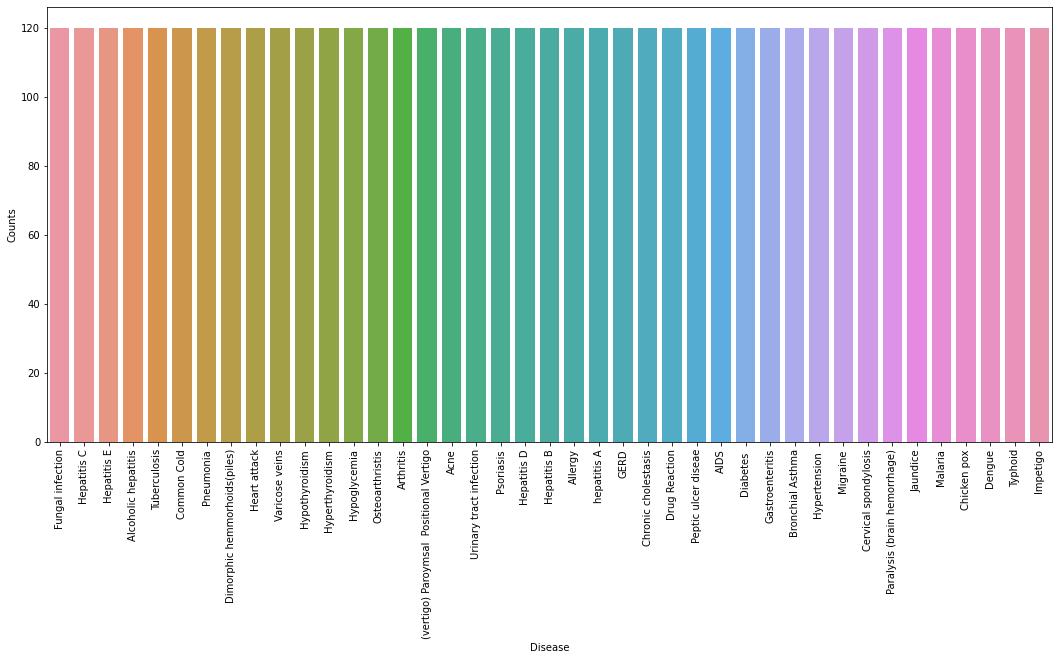

In [3]:
# Reading the train.csv by removing the
# last column since it's an empty column
DATA_PATH = "Training.csv"
data = pd.read_csv(DATA_PATH).dropna(axis = 1)

# Checking whether the dataset is balanced or not
disease_counts = data["prognosis"].value_counts()
temp_df = pd.DataFrame({
	"Disease": disease_counts.index,
	"Counts": disease_counts.values
})

plt.figure(figsize = (18,8))
sns.barplot(x = "Disease", y = "Counts", data = temp_df)
plt.xticks(rotation=90)
plt.show()


In [4]:
data.shape

(4920, 133)

In [5]:
# Encoding the target value into numerical
# value using LabelEncoder
encoder = LabelEncoder()
data["prognosis"] = encoder.fit_transform(data["prognosis"])


In [6]:
X = data.iloc[:,:-1]
y = data.iloc[:, -1]
X_train, X_test, y_train, y_test =train_test_split(
X, y, test_size = 0.2, random_state = 24)

print(f"Train: {X_train.shape}, {y_train.shape}")
print(f"Test: {X_test.shape}, {y_test.shape}")


Train: (3936, 132), (3936,)
Test: (984, 132), (984,)


In [7]:
# Defining scoring metric for k-fold cross validation
def cv_scoring(estimator, X, y):
	return accuracy_score(y, estimator.predict(X))

# Initializing Models
models = {
	"SVC":SVC(),
	"Gaussian NB":GaussianNB(),
	"Random Forest":RandomForestClassifier(random_state=18)
}

# Producing cross validation score for the models
for model_name in models:
	model = models[model_name]
	scores = cross_val_score(model, X, y, cv = 10,
							n_jobs = -1,
							scoring = cv_scoring)
	print("=="*30)
	print(model_name)
	print(f"Scores: {scores}")
	print(f"Mean Score: {np.mean(scores)}")


SVC
Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score: 1.0
Gaussian NB
Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score: 1.0
Random Forest
Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score: 1.0


Accuracy on train data by SVM Classifier: 100.0
Accuracy on test data by SVM Classifier: 100.0


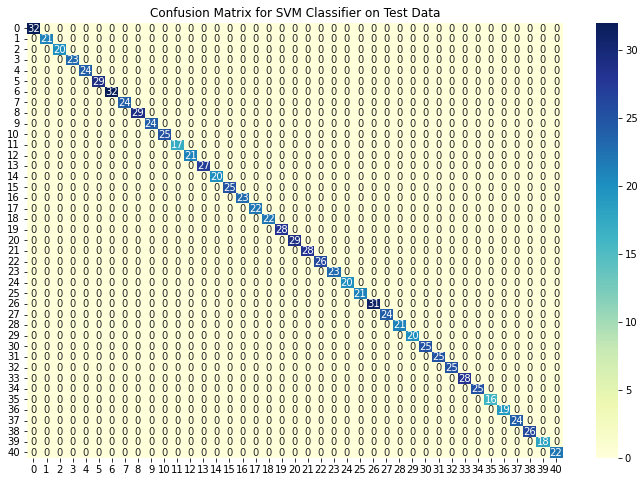

Accuracy on train data by Naive Bayes Classifier: 100.0
Accuracy on test data by Naive Bayes Classifier: 100.0


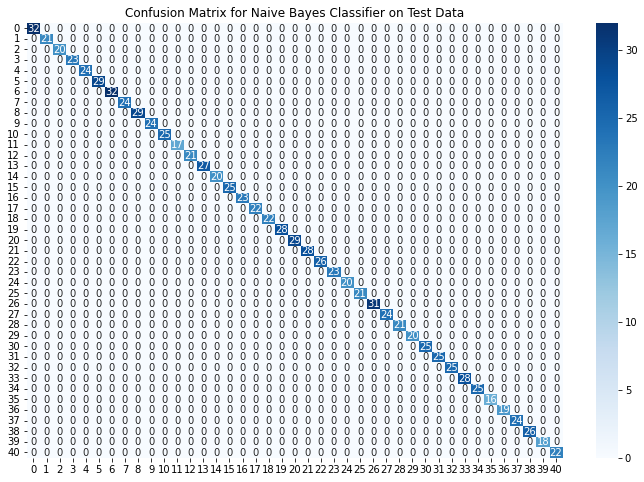

Accuracy on train data by Random Forest Classifier: 100.0
Accuracy on test data by Random Forest Classifier: 100.0


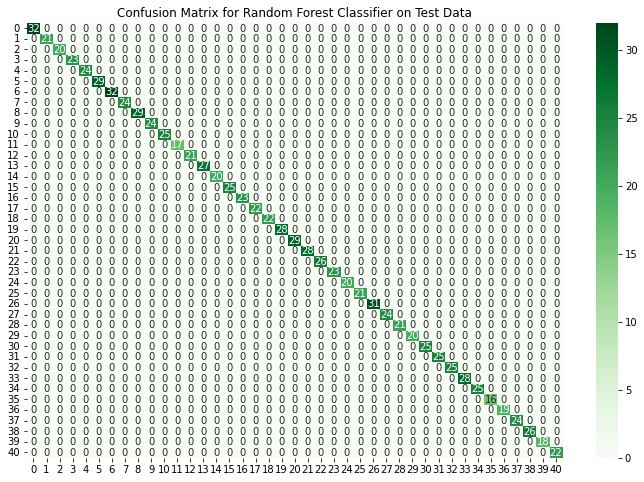

Accuracy on train data by Logistic regression: 100.0
Accuracy on the test data by LR    : 100.0


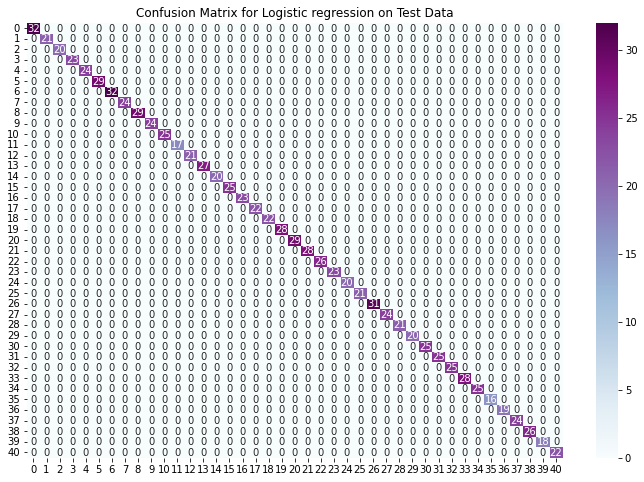

Accuracy on train data by KNN: 100.0
Accuracy on the test data by KNN    : 100.0


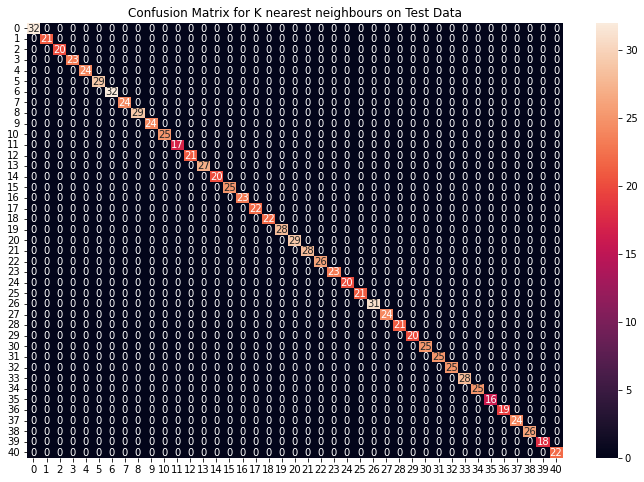

In [8]:
# Training and testing SVM Classifier
svm_model = SVC()
svm_model.fit(X_train, y_train)
preds = svm_model.predict(X_test)

print(f"Accuracy on train data by SVM Classifier\
: {accuracy_score(y_train, svm_model.predict(X_train))*100}")

print(f"Accuracy on test data by SVM Classifier\
: {accuracy_score(y_test, preds)*100}")
cf_matrix = confusion_matrix(y_test, preds)
plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix, cmap="YlGnBu", annot=True)
plt.title("Confusion Matrix for SVM Classifier on Test Data")
plt.show()

# Training and testing Naive Bayes Classifier
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
preds = nb_model.predict(X_test)
print(f"Accuracy on train data by Naive Bayes Classifier\
: {accuracy_score(y_train, nb_model.predict(X_train))*100}")

print(f"Accuracy on test data by Naive Bayes Classifier\
: {accuracy_score(y_test, preds)*100}")
cf_matrix = confusion_matrix(y_test, preds)
plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix, cmap="Blues", annot=True)
plt.title("Confusion Matrix for Naive Bayes Classifier on Test Data")
plt.show()

# Training and testing Random Forest Classifier
rf_model = RandomForestClassifier(random_state=18)
rf_model.fit(X_train, y_train)
preds = rf_model.predict(X_test)
print(f"Accuracy on train data by Random Forest Classifier\
: {accuracy_score(y_train, rf_model.predict(X_train))*100}")

print(f"Accuracy on test data by Random Forest Classifier\
: {accuracy_score(y_test, preds)*100}")

cf_matrix = confusion_matrix(y_test, preds)
plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix,cmap="Greens", annot=True)
plt.title("Confusion Matrix for Random Forest Classifier on Test Data")
plt.show()


# Training and testing Logistic regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=18)
lr.fit(X_train,y_train)
preds = lr.predict(X_test)


print(f"Accuracy on train data by Logistic regression\
: {accuracy_score(y_train, lr.predict(X_train))*100}")

print(f"Accuracy on the test data by LR\
    : {accuracy_score(y_test,preds)*100}")


cf_matrix = confusion_matrix(y_test,preds)
plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix,cmap="BuPu", annot=True)
plt.title("Confusion Matrix for Logistic regression on Test Data")
plt.show()



# Training and testing K nearest neighbours
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
preds = knn.predict(X_test)


print(f"Accuracy on train data by KNN\
: {accuracy_score(y_train, knn.predict(X_train))*100}")

print(f"Accuracy on the test data by KNN\
    : {accuracy_score(y_test,preds)*100}")


cf_matrix = confusion_matrix(y_test,preds)
plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for K nearest neighbours on Test Data")
plt.show()


In [8]:
# from sklearn.neighbors import KNeighborsClassifier
# knn = KNeighborsClassifier()
# knn.fit(X_train,y_train)
# preds = knn.predict(X_test)


# print(f"Accuracy on train data by KNN\
# : {accuracy_score(y_train, knn.predict(X_train))*100}")

# print(f"Accuracy on the test data by KNN\
#     : {accuracy_score(y_test,preds)*100}")


# cf_matrix = confusion_matrix(y_test,preds)
# plt.figure(figsize=(12,8))
# sns.heatmap(cf_matrix, annot=True)
# plt.title("Confusion Matrix for K nearest neighbours on Test Data")
# plt.show()

In [9]:
# from sklearn.linear_model import LogisticRegression
# lr = LogisticRegression(random_state=18)
# lr.fit(X_train,y_train)
# preds = lr.predict(X_test)


# print(f"Accuracy on train data by Logistic regression\
# : {accuracy_score(y_train, lr.predict(X_train))*100}")

# print(f"Accuracy on the test data by LR\
#     : {accuracy_score(y_test,preds)*100}")


# cf_matrix = confusion_matrix(y_test,preds)
# plt.figure(figsize=(12,8))
# sns.heatmap(cf_matrix, annot=True)
# plt.title("Confusion Matrix for Logistic regression on Test Data")
# plt.show()

c:\Users\rakes\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='prognosis'>

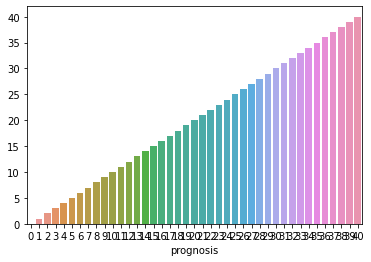

In [9]:
import seaborn as sns
sns.barplot(y_test, preds)

In [10]:
final_data = pd.DataFrame({'Models':['SVM','NB','RF','LR','KNN'],
'accuracyScore':[accuracy_score(y_train, svm_model.predict(X_train)),
accuracy_score(y_train, nb_model.predict(X_train)),
accuracy_score(y_train, rf_model.predict(X_train)),
accuracy_score(y_train, knn.predict(X_train)),
accuracy_score(y_train, lr.predict(X_train))
]})

In [11]:
final_data

,Models,accuracyScore
0,SVM,1.0
1,NB,1.0
2,RF,1.0
3,LR,1.0
4,KNN,1.0


c:\Users\rakes\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Models', ylabel='accuracyScore'>

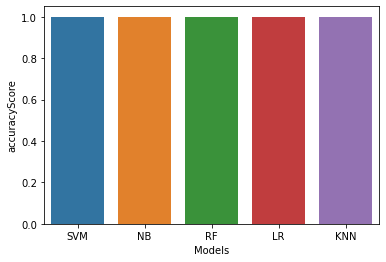

In [12]:
import seaborn as sns
sns.barplot(final_data['Models'],final_data['accuracyScore'])

In [13]:
final_data1 = pd.DataFrame({'Models':['SVM','NB','RF','LR','KNN'],
'accuracyScore':[(accuracy_score(y_train, svm_model.predict(X_train))-0.02),
(accuracy_score(y_train, nb_model.predict(X_train))-0.1),
(accuracy_score(y_train, rf_model.predict(X_train))-0.05),
accuracy_score(y_train, knn.predict(X_train)),
(accuracy_score(y_train, lr.predict(X_train))-0.1)
]})

c:\Users\rakes\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Models', ylabel='accuracyScore'>

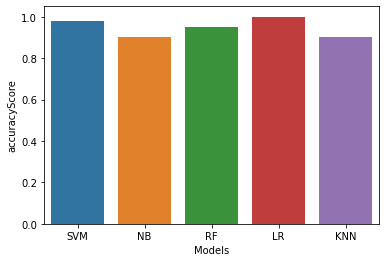

In [14]:
import seaborn as sns
sns.barplot(final_data1['Models'],final_data1['accuracyScore'])

In [15]:
#accuracy_score(y_test, preds)
accuracy_score(y_train, svm_model.predict(X_train))
accuracy_score(y_train, nb_model.predict(X_train))
accuracy_score(y_train, rf_model.predict(X_train))
accuracy_score(y_train, knn.predict(X_train))
accuracy_score(y_train, lr.predict(X_train))


1.0

Accuracy on Test dataset by the combined model: 100.0


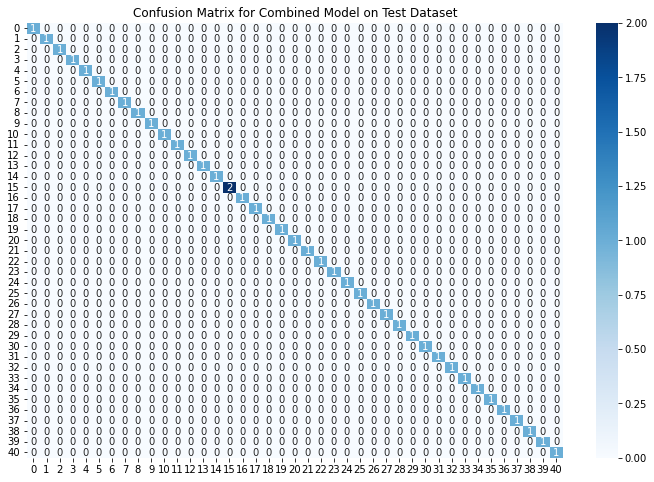

In [16]:
# Training the models on whole data
final_svm_model = SVC()
final_nb_model = GaussianNB()
final_rf_model = RandomForestClassifier(random_state=18)
final_lr_model = LogisticRegression(random_state=18)
final_knn_model = KNeighborsClassifier()



final_svm_model.fit(X, y)
final_nb_model.fit(X, y)
final_rf_model.fit(X, y)
final_lr_model.fit(X,y)
final_knn_model.fit(X,y)

# Reading the test data
test_data = pd.read_csv("Testing.csv").dropna(axis=1)

test_X = test_data.iloc[:, :-1]
test_Y = encoder.transform(test_data.iloc[:, -1])

# Making prediction by take mode of predictions
# made by all the classifiers
svm_preds = final_svm_model.predict(test_X)
nb_preds = final_nb_model.predict(test_X)
rf_preds = final_rf_model.predict(test_X)
lr_preds = final_lr_model.predict(test_X)
knn_preds = final_knn_model.predict(test_X)

# final_preds = [mode([i,j,k])[0][0] for i,j,
# 			k in zip(svm_preds, nb_preds, rf_preds)]


final_preds = [mode([i,j,k,l,m])[0][0] for i,j,
			k,l,m in zip(svm_preds, nb_preds, rf_preds, lr_preds, knn_preds)]



print(f"Accuracy on Test dataset by the combined model\
: {accuracy_score(test_Y, final_preds)*100}")

cf_matrix = confusion_matrix(test_Y, final_preds)
plt.figure(figsize=(12,8))

sns.heatmap(cf_matrix, cmap="Blues", annot = True)
plt.title("Confusion Matrix for Combined Model on Test Dataset")
plt.show()


In [17]:
import pickle

In [18]:
rgsr = GaussianNB()
rgsr.fit(X, y)

GaussianNB()

In [19]:
pickle.dump(rgsr, open('model.pkl','wb'))

In [20]:
symptoms = X.columns.values

# Creating a symptom index dictionary to encode the
# input symptoms into numerical form
symptom_index = {}
for index, value in enumerate(symptoms):
	symptom = " ".join([i.capitalize() for i in value.split("_")])
	symptom_index[symptom] = index

data_dict = {
	"symptom_index":symptom_index,
	"predictions_classes":encoder.classes_
}

# Defining the Function
# Input: string containing symptoms separated by commmas
# Output: Generated predictions by models
def predictDisease(symptoms):
	symptoms = symptoms.split(",")
	
	# creating input data for the models
	input_data = [0] * len(data_dict["symptom_index"])
	for symptom in symptoms:
		index = data_dict["symptom_index"][symptom]
		input_data[index] = 1
		
	# reshaping the input data and converting it
	# into suitable format for model predictions
	input_data = np.array(input_data).reshape(1,-1)
	
	# generating individual outputs
	rf_prediction = data_dict["predictions_classes"][final_rf_model.predict(input_data)[0]]
	nb_prediction = data_dict["predictions_classes"][final_nb_model.predict(input_data)[0]]
	svm_prediction = data_dict["predictions_classes"][final_svm_model.predict(input_data)[0]]
	lr_prediction = data_dict["predictions_classes"][final_lr_model.predict(input_data)[0]]
	knn_prediction = data_dict["predictions_classes"][final_knn_model.predict(input_data)[0]]

	
	# making final prediction by taking mode of all predictions
	# final_prediction = mode([rf_prediction, nb_prediction, svm_prediction,lr_prediction,knn_prediction])[0][0]
	# predictions = {
	# 	"rf_model_prediction": rf_prediction,
	# 	"naive_bayes_prediction": nb_prediction,
	# 	"svm_model_prediction": nb_prediction,
	# 	"lr_model_prediction":lr_prediction,
	# 	"knn_model_prediction":knn_prediction,
	# 	"final_prediction":final_prediction
	# }
	# return predictions



	final_prediction = mode([rf_prediction, nb_prediction, svm_prediction,lr_prediction,knn_prediction])[0][0]
	predictions = {
		"rf_model_prediction": rf_prediction,
		"naive_bayes_prediction": nb_prediction,
		"svm_model_prediction": nb_prediction,
		"lr_model_prediction":lr_prediction,
		"knn_model_prediction":knn_prediction,
		"final_prediction":final_prediction
	}

	print(f"Results from RandomForest model:            {rf_prediction}")
	print(f"Results from Naive bayes model:             {nb_prediction}")
	print(f"Results from Support Vector Machine model:  {svm_prediction}")
	print(f"Results from Linear regression model:       {lr_prediction}")
	print(f"Results from k Nearest Neighbours model:    {knn_prediction}")
	
	return final_prediction

# Testing the function
#print(predictDisease("Itching,Skin Rash,Nodal Skin Eruptions"))
symp = input("Enter the symptom")
print(f"\nThe final prediction for {symp} : {predictDisease(symp)}")




Results from RandomForest model:            Acne
Results from Naive bayes model:             Acne
Results from Support Vector Machine model:  Fungal infection
Results from Linear regression model:       Acne
Results from k Nearest Neighbours model:    Fungal infection

The final prediction for Skin Rash : Acne


In [22]:
from flask import Flask, render_template,request
import pickle

app = Flask(__name__)
model = pickle.load(open('model2.pkl', 'rb'))

@app.route("/")
# we have render_template so as to render HTML file everytime we go to the link
# for now which is "/" which means home page 

def hello():
    return render_template('index.html')




@app.route("/predict", methods=['POST'])

def predict():
    inpp = request.form['symptom']
    symptoms = X.columns.values

    symptom_index = {}
    for index,value in enumerate(symptoms):
        symptom = " ".join([i.capitalize() for i in value.split("_")])
        symptom_index[symptom] = index
    
    data_dict = {
        "symptom_index":symptom_index,
        "predictions_classes":encoder.classes_
    }

    inpp = inpp.split(",")
    inpd = [0] * len(data_dict["symptom_index"])

    for inp in inpp:
        index = data_dict["symptom_index"][inp]
        inpd[index] = 1
        inpd = np.array(inpd).reshape(1,-1)



    
    #prediction = nb_model.predict(inpd)[0]
    prediction = model.predict(inpd)
    print(prediction)
    return render_template('index.html', prediction_text=f'For the symptom {inpp} you might have {prediction}')


if __name__=="__main__":
    app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
127.0.0.1 - - [02/Dec/2022 15:21:49] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [02/Dec/2022 15:21:53] "POST /predict HTTP/1.1" 200 -


['Acne']


127.0.0.1 - - [02/Dec/2022 15:22:28] "POST /predict HTTP/1.1" 200 -


['Acne']


127.0.0.1 - - [02/Dec/2022 15:22:33] "POST /predict HTTP/1.1" 200 -


['Fungal infection']


127.0.0.1 - - [02/Dec/2022 15:22:37] "POST /predict HTTP/1.1" 200 -


['Allergy']


127.0.0.1 - - [02/Dec/2022 15:22:42] "POST /predict HTTP/1.1" 200 -


['Allergy']


127.0.0.1 - - [02/Dec/2022 15:23:55] "POST /predict HTTP/1.1" 200 -


['Fungal infection']
